In [1]:
import cv2

import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('image.jpg', cv2.IMREAD_COLOR)

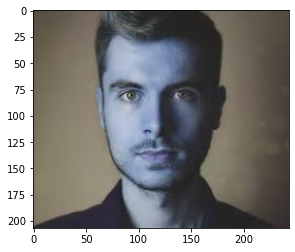

In [3]:

plt.imshow(img)
plt.show()

NameError: name 'face_cascade' is not defined

In [29]:
face_classifier = cv2.CascadeClassifier('Haar_Cascades_Classifier/haarcascade_frontalface_default.xml')

In [30]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eyes_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [31]:
faces_detected = face_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5)

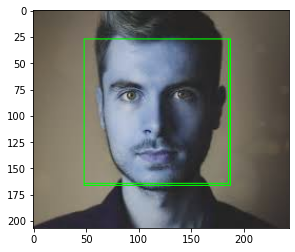

In [20]:
(x, y, w, h) = faces_detected[0]
cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 1);

plt.imshow(img)
plt.show()

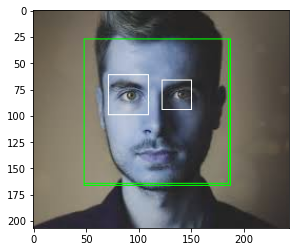

In [21]:
eyes = eyes_cascade.detectMultiScale(img[y:y+h, x:x+w])
for (ex, ey, ew, eh) in eyes:
    cv2.rectangle(img, (x+ex, y+ey), (x+ex+ew, y+ey+eh), 
                  (255, 255, 255), 1)
plt.imshow(img)
plt.show()

In [33]:
cv2.imwrite('crop2.jpg', img[y-6+1:y+h+2, x-5+1:x+w+5])

True

In [ ]:
img = cv2.imread('crop2.jpg', cv2.IMREAD_COLOR)

## Image resizing

In [42]:
a=cv2.resize(img, (88, 77), interpolation=cv2.INTER_LINEAR)

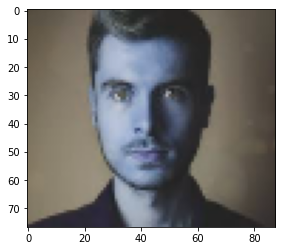

In [43]:
plt.imshow(a)
plt.show()

In [48]:
from numpy import shape

In [49]:
x = int((shape[21][0]+shape[22][0])/2)
y = int((shape[21][1]+shape[22][1])/2)
w = abs(shape[39][0]-shape[42][0])
h = abs(y-shape[29][1])

y_mid = int((y + (y - h)) / 2)
roi = img[y-h:y_mid,int(x-w/2):int(x+w/2)]

if(roi.shape[0] !=0 and roi.shape[1] != 0):
    roi = imutils.resize(roi, width=250, inter=cv2.INTER_CUBIC)
    cv2.imshow('ROI', roi)

cv2.rectangle(image,(int(x-w/2), int(y-h)), (int(x + w/2), y_mid), (0, 0, 255), 1)
plt.imshow(a)
plt.show()

TypeError: 'function' object is not subscriptable

# forehead recognitiion

In [5]:
import face_recognition
import cv2
import PIL.Image
import PIL.ImageDraw
import os
#image=cv2.imread(img_path)
unknown_image = face_recognition.load_image_file("wer.jpg")
face_locations = face_recognition.face_locations(unknown_image) # detects all the faces in image
t = len(face_locations)
print(len(face_locations))
print(face_locations)
face_landmarks_list = face_recognition.face_landmarks(unknown_image)
# Drawing rectangles over the faces
pil_image = PIL.Image.fromarray(unknown_image)
for face_location in face_locations:
    #print(face_location)
    top,right,bottom,left =face_location
    draw_shape = PIL.ImageDraw.Draw(pil_image)
    im = PIL.Image.open("wer.jpg")
    #bottom=34
    k = face_landmarks_list[0]['right_eyebrow']
    bottom= face_landmarks_list[0]['right_eyebrow'][0][1]
    for k1 in k :   
        if(bottom>k1[1]):
            bottom=k1[1]
    k = face_landmarks_list[0]['left_eyebrow']
    lbottom= face_landmarks_list[0]['left_eyebrow'][0][1]
    for k1 in k :   
        if(lbottom>k1[1]):
            lbottom=k1[1]
    bottom=min(bottom,lbottom)
    print(bottom)
    im = im.crop((left, top, right, bottom))
    im.save("m3.jpg")    
    draw_shape.rectangle([left, top, right, bottom],outline="blue")

1
[(348, 861, 811, 399)]
427


In [4]:
import dlib
import face_recognition
image = face_recognition.load_image_file("image.jpg")
face_locations = face_recognition.face_locations(image)

In [8]:
import face_recognition
known_image = face_recognition.load_image_file("image.jpg")
unknown_image = face_recognition.load_image_file("qwe.jpg")

biden_encoding = face_recognition.face_encodings(known_image)[0]
unknown_encoding = face_recognition.face_encodings(unknown_image)[0]

results = face_recognition.compare_faces([biden_encoding], unknown_encoding)

[False]

## EYes and Lips recognition

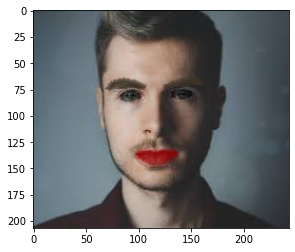

In [13]:
from PIL import Image, ImageDraw
import face_recognition

# Load the jpg file into a numpy array
image = face_recognition.load_image_file("image.jpg")

# Find all facial features in all the faces in the image
face_landmarks_list = face_recognition.face_landmarks(image)

pil_image = Image.fromarray(image)
for face_landmarks in face_landmarks_list:
    d = ImageDraw.Draw(pil_image, 'RGBA')

    # Make the eyebrows into a nightmare
    d.polygon(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 128))
    d.polygon(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 128))
    d.line(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 150), width=5)
    d.line(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 150), width=5)

    # Gloss the lips
    d.polygon(face_landmarks['top_lip'], fill=(150, 0, 0, 128))
    d.polygon(face_landmarks['bottom_lip'], fill=(150, 0, 0, 128))
    d.line(face_landmarks['top_lip'], fill=(150, 0, 0, 64), width=8)
    d.line(face_landmarks['bottom_lip'], fill=(150, 0, 0, 64), width=8)

    # Sparkle the eyes
    d.polygon(face_landmarks['left_eye'], fill=(255, 255, 255, 30))
    d.polygon(face_landmarks['right_eye'], fill=(255, 255, 255, 30))

    # Apply some eyeliner
    d.line(face_landmarks['left_eye'] + [face_landmarks['left_eye'][0]], fill=(0, 0, 0, 110), width=6)
    d.line(face_landmarks['right_eye'] + [face_landmarks['right_eye'][0]], fill=(0, 0, 0, 110), width=6)

    plt.imshow(pil_image)
    plt.show()

## Face recognition from video

In [14]:
import face_recognition
import cv2
import numpy as np

# This is a demo of running face recognition on live video from your webcam. It's a little more complicated than the
# other example, but it includes some basic performance tweaks to make things run a lot faster:
#   1. Process each video frame at 1/4 resolution (though still display it at full resolution)
#   2. Only detect faces in every other frame of video.

# PLEASE NOTE: This example requires OpenCV (the `cv2` library) to be installed only to read from your webcam.
# OpenCV is *not* required to use the face_recognition library. It's only required if you want to run this
# specific demo. If you have trouble installing it, try any of the other demos that don't require it instead.

# Get a reference to webcam #0 (the default one)
video_capture = cv2.VideoCapture(0)

# Load a sample picture and learn how to recognize it.
obama_image = face_recognition.load_image_file("image.jpg")
obama_face_encoding = face_recognition.face_encodings(obama_image)[0]

# Load a second sample picture and learn how to recognize it.
biden_image = face_recognition.load_image_file("qwe.jpg")
biden_face_encoding = face_recognition.face_encodings(biden_image)[0]

# Create arrays of known face encodings and their names
known_face_encodings = [
    obama_face_encoding,
    biden_face_encoding
]
known_face_names = [
    "Barack Obama",
    "Joe Biden"
]

# Initialize some variables
face_locations = []
face_encodings = []
face_names = []
process_this_frame = True

while True:
    # Grab a single frame of video
    ret, frame = video_capture.read()

    # Resize frame of video to 1/4 size for faster face recognition processing
    small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)

    # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
    rgb_small_frame = small_frame[:, :, ::-1]

    # Only process every other frame of video to save time
    if process_this_frame:
        # Find all the faces and face encodings in the current frame of video
        face_locations = face_recognition.face_locations(rgb_small_frame)
        face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)

        face_names = []
        for face_encoding in face_encodings:
            # See if the face is a match for the known face(s)
            matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
            name = "Unknown"

            # # If a match was found in known_face_encodings, just use the first one.
            # if True in matches:
            #     first_match_index = matches.index(True)
            #     name = known_face_names[first_match_index]

            # Or instead, use the known face with the smallest distance to the new face
            face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = known_face_names[best_match_index]

            face_names.append(name)

    process_this_frame = not process_this_frame


    # Display the results
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        # Scale back up face locations since the frame we detected in was scaled to 1/4 size
        top *= 4
        right *= 4
        bottom *= 4
        left *= 4

        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

        # Draw a label with a name below the face
        cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

    # Display the resulting image
    cv2.imshow('Video', frame)

    # Hit 'q' on the keyboard to quit!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release handle to the webcam
video_capture.release()
cv2.destroyAllWindows()

## AUTOMATICALLY FIND ALL THE FACES IN AN IMAGE

I found 1 face(s) in this photograph.
A face is located at pixel location Top: 46, Left: 66, Bottom: 136, Right: 155


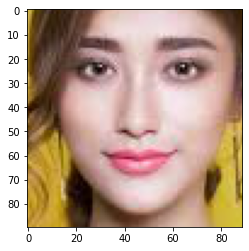

In [19]:
from PIL import Image
import face_recognition

# Load the jpg file into a numpy array
image = face_recognition.load_image_file("qwe.jpg")

# Find all the faces in the image using the default HOG-based model.
# This method is fairly accurate, but not as accurate as the CNN model and not GPU accelerated.
# See also: find_faces_in_picture_cnn.py
face_locations = face_recognition.face_locations(image)

print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    pil_image = Image.fromarray(face_image)
    plt.imshow(pil_image)
    plt.show()

## Face recognition from videos


In [ ]:
import face_recognition
import cv2

# This code finds all faces in a list of images using the CNN model.
#
# This demo is for the _special case_ when you need to find faces in LOTS of images very quickly and all the images
# are the exact same size. This is common in video processing applications where you have lots of video frames
# to process.
#
# If you are processing a lot of images and using a GPU with CUDA, batch processing can be ~3x faster then processing
# single images at a time. But if you aren't using a GPU, then batch processing isn't going to be very helpful.
#
# PLEASE NOTE: This example requires OpenCV (the `cv2` library) to be installed only to read the video file.
# OpenCV is *not* required to use the face_recognition library. It's only required if you want to run this
# specific demo. If you have trouble installing it, try any of the other demos that don't require it instead.

# Open video file
video_capture = cv2.VideoCapture("short_hamilton_clip.mp4")

frames = []
frame_count = 0

while video_capture.isOpened():
    # Grab a single frame of video
    ret, frame = video_capture.read()

    # Bail out when the video file ends
    if not ret:
        break

    # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
    frame = frame[:, :, ::-1]

    # Save each frame of the video to a list
    frame_count += 1
    frames.append(frame)

    # Every 128 frames (the default batch size), batch process the list of frames to find faces
    if len(frames) == 128:
        batch_of_face_locations = face_recognition.batch_face_locations(frames, number_of_times_to_upsample=0)

        # Now let's list all the faces we found in all 128 frames
        for frame_number_in_batch, face_locations in enumerate(batch_of_face_locations):
            number_of_faces_in_frame = len(face_locations)

            frame_number = frame_count - 128 + frame_number_in_batch
            print("I found {} face(s) in frame #{}.".format(number_of_faces_in_frame, frame_number))

            for face_location in face_locations:
                # Print the location of each face in this frame
                top, right, bottom, left = face_location
                print(" - A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

        # Clear the frames array to start the next batch
        frames = []

## AUTOMATICALLY LOCATE THE FACIAL FEATURES OF A PERSON IN AN IMAGE

I found 1 face(s) in this photograph.
The chin in this face has the following points: [(65, 79), (66, 95), (69, 110), (72, 125), (75, 139), (83, 151), (94, 161), (106, 169), (118, 171), (132, 169), (144, 161), (155, 150), (163, 138), (168, 123), (171, 108), (173, 92), (173, 77)]
The left_eyebrow in this face has the following points: [(70, 75), (76, 68), (86, 66), (96, 68), (106, 73)]
The right_eyebrow in this face has the following points: [(124, 73), (133, 69), (142, 66), (152, 65), (160, 70)]
The nose_bridge in this face has the following points: [(116, 80), (116, 90), (116, 101), (116, 111)]
The nose_tip in this face has the following points: [(106, 116), (111, 118), (117, 120), (122, 118), (127, 115)]
The left_eye in this face has the following points: [(84, 82), (88, 78), (95, 78), (101, 81), (94, 84), (88, 84)]
The right_eye in this face has the following points: [(132, 80), (137, 77), (143, 77), (149, 79), (144, 82), (138, 82)]
The top_lip in this face has the following points:

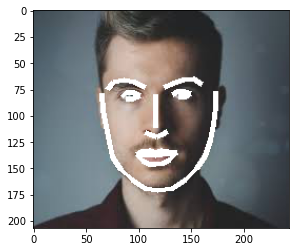

In [24]:
from PIL import Image, ImageDraw
import face_recognition

# Load the jpg file into a numpy array
image = face_recognition.load_image_file("image.jpg")

# Find all facial features in all the faces in the image
face_landmarks_list = face_recognition.face_landmarks(image)

print("I found {} face(s) in this photograph.".format(len(face_landmarks_list)))

# Create a PIL imagedraw object so we can draw on the picture
pil_image = Image.fromarray(image)
d = ImageDraw.Draw(pil_image)

for face_landmarks in face_landmarks_list:

    # Print the location of each facial feature in this image
    for facial_feature in face_landmarks.keys():
        print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

    # Let's trace out each facial feature in the image with a line!
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=5)

# Show the picture
plt.imshow(pil_image)
plt.show()


## RECOGNIZE FACES IN IMAGES AND IDENTIFY WHO THEY ARE


In [25]:
import face_recognition

# Load the jpg files into numpy arrays
biden_image = face_recognition.load_image_file("image.jpg")
obama_image = face_recognition.load_image_file("qwe.jpg")
unknown_image = face_recognition.load_image_file("wer.jpg")

# Get the face encodings for each face in each image file
# Since there could be more than one face in each image, it returns a list of encodings.
# But since I know each image only has one face, I only care about the first encoding in each image, so I grab index 0.
try:
    biden_face_encoding = face_recognition.face_encodings(biden_image)[0]
    obama_face_encoding = face_recognition.face_encodings(obama_image)[0]
    unknown_face_encoding = face_recognition.face_encodings(unknown_image)[0]
except IndexError:
    print("I wasn't able to locate any faces in at least one of the images. Check the image files. Aborting...")
    quit()

known_faces = [
    biden_face_encoding,
    obama_face_encoding
]

# results is an array of True/False telling if the unknown face matched anyone in the known_faces array
results = face_recognition.compare_faces(known_faces, unknown_face_encoding)

print("Is the unknown face a picture of Biden? {}".format(results[0]))
print("Is the unknown face a picture of Obama? {}".format(results[1]))
print("Is the unknown face a new person that we've never seen before? {}".format(not True in results))

Is the unknown face a picture of Biden? False
Is the unknown face a picture of Obama? False
Is the unknown face a new person that we've never seen before? True
